# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta do Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta do Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta do Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta do Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
# Criando faixas de latitude com o map e lambda
sinasc_raw['faixa_latitude'] = sinasc_raw['munResLat'].map(lambda lat: '> -10.5' if lat > -10.5 else '< -10.5')

# Aplicar groupby usando as faixas de latitude
df_agrupado = sinasc_raw.groupby('faixa_latitude')

# Calcular as estatísticas para 'IDADEMAE' e 'PESO'
estatisticas = df_agrupado.agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

print(estatisticas)

  faixa_latitude IDADEMAE                                                 \
                      sum       mean min max median       std        var   
0        < -10.5   340167  26.178775  12  53   26.0  6.320171  39.944563   
1        > -10.5   365094  26.014964  11  52   25.0  6.447663  41.572355   

       PESO                                                             
        sum         mean  min   max  median         std            var  
0  42101809  3240.096121  258  5985  3270.0  531.794694  282805.596163  
1  45555148  3246.055864  295  5190  3275.0  556.487709  309678.570242  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
# Criando faixas de área com o map e lambda
sinasc_raw['faixa_area'] = sinasc_raw['munResArea'].map(lambda area: '> 3000' if area > 3000 else '< 3000')

# Aplicar groupby usando as faixas de latitude
df_agrupado_2 = sinasc_raw.groupby('faixa_area')

# Calcular as estatísticas para 'IDADEPAI' e 'QTDFILVIVO'
estatisticas = df_agrupado_2.agg({
    'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

print(estatisticas)

  faixa_area  IDADEPAI                                                     \
                   sum       mean   min   max median       std        var   
0     < 3000   78096.0  31.089172  16.0  69.0   30.0  7.676090  58.922352   
1     > 3000  158424.0  31.094014  15.0  86.0   30.0  7.818364  61.126809   

  QTDFILVIVO                                                  
         sum      mean  min   max median       std       var  
0     4774.0  0.924298  0.0  30.0    1.0  1.075338  1.156352  
1    22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
# Criando faixas de altitude com o map e lambda
sinasc_raw['faixa_altitude'] = sinasc_raw['munResAlt'].map(lambda altitude: '> 100' if altitude > 100 else '< 100')

# Aplicar groupby usando as faixas de latitude
df_agrupado_3 = sinasc_raw.groupby('faixa_altitude')

# Calcular as estatísticas para 'APGAR5' e 'QTDFILMORT', alterando de soma para count no APGAR5, pois a soma não faz sentido para essa coluna
estatisticas = df_agrupado_3.agg({
    'APGAR5': ['count', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
}).reset_index()

print(estatisticas)

  faixa_altitude APGAR5                                                  \
                  count      mean  min   max median       std       var   
0          < 100   8826  9.214933  0.0  10.0    9.0  0.760145  0.577821   
1          > 100  18099  9.161722  0.0  10.0    9.0  0.804440  0.647123   

  QTDFILMORT                                                  
         sum      mean  min   max median       std       var  
0     2310.0  0.309196  0.0   9.0    0.0  0.641050  0.410945  
1     4334.0  0.248239  0.0  28.0    0.0  0.601014  0.361217  


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [8]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho do Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada do Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta do Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão do Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia do Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia do Oeste": "Cacoal",
    "São Felipe do Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

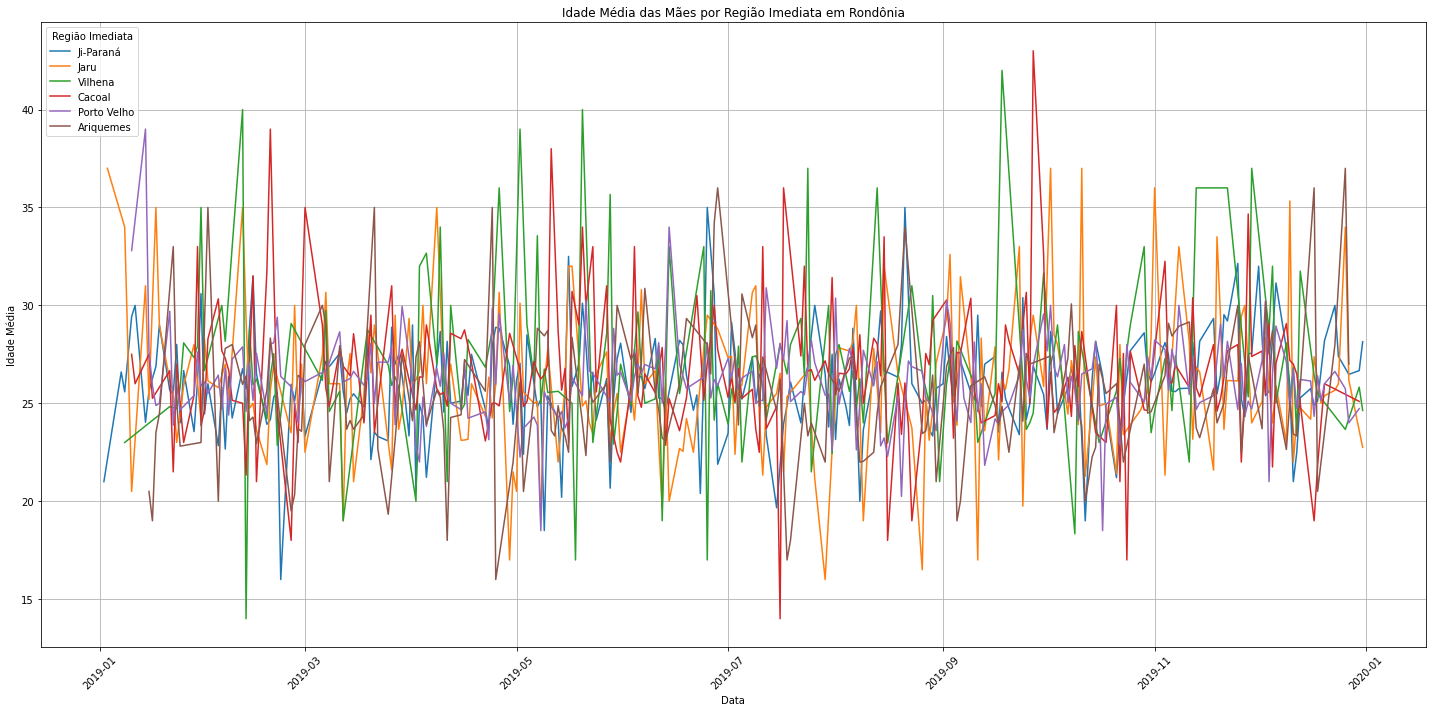

In [9]:
# Associando as regiões imediatas aos municipios da base
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

# Convertendo para data e separando os componentes para ficar mais fácil o filtro de dia e mês
sinasc_raw['DTCADASTRO'] = pd.to_datetime(sinasc_raw['DTCADASTRO'])
sinasc_raw['ano'] = sinasc_raw['DTCADASTRO'].dt.year
sinasc_raw['mes'] = sinasc_raw['DTCADASTRO'].dt.month
sinasc_raw['dia'] = sinasc_raw['DTCADASTRO'].dt.day

# Filtrando apenas os nascimentos ocorridos somente em 2019, pois é onde se concentram a maioria das informações do nosso banco de dados
sinasc_raw = sinasc_raw[sinasc_raw['ano'] == 2019]

# Agrupando com a data, região e a idade média das mães
df_agrupado_4 = sinasc_raw.groupby(['DTCADASTRO', 'regiao_imediata'])['IDADEMAE'].mean().reset_index()

# Plotando o gráfico
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_agrupado_4, x='DTCADASTRO', y='IDADEMAE', hue='regiao_imediata')
plt.title('Idade Média das Mães por Região Imediata em Rondônia')
plt.xlabel('Data')
plt.ylabel('Idade Média')
plt.legend(title='Região Imediata', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [10]:
mapeamento_idh = {
    # IDH-M Alto
    "Porto Velho": "IDH-M Alto",
    "Vilhena": "IDH-M Alto",
    "Cacoal": "IDH-M Alto",
    "Ji-Paraná": "IDH-M Alto",
    "Pimenta Bueno": "IDH-M Alto",
    "Ariquemes": "IDH-M Alto",
    "Rolim de Moura": "IDH-M Alto",
    # IDH-M Médio
    "Cerejeiras": "IDH-M Médio",
    "Jaru": "IDH-M Médio",
    "Colorado do Oeste": "IDH-M Médio",
    "Ouro Preto do Oeste": "IDH-M Médio",
    "Espigão do Oeste": "IDH-M Médio",
    "Santa Luzia do Oeste": "IDH-M Médio",
    "Pimenteiras do Oeste": "IDH-M Médio",
    "Presidente Médici": "IDH-M Médio",
    "Castanheiras": "IDH-M Médio",
    "Guajará-Mirim": "IDH-M Médio",
    "Chupinguaia": "IDH-M Médio",
    "Cabixi": "IDH-M Médio",
    "Candeias do Jamari": "IDH-M Médio",
    "São Felipe do Oeste": "IDH-M Médio",
    "Cacaulândia": "IDH-M Médio",
    "São Miguel do Guaporé": "IDH-M Médio",
    "Mirante da Serra": "IDH-M Médio",
    "Alvorada do Oeste": "IDH-M Médio",
    "Teixeirópolis": "IDH-M Médio",
    "Nova Brasilândia do Oeste": "IDH-M Médio",
    "Rio Crespo": "IDH-M Médio",
    "Primavera de Rondônia": "IDH-M Médio",
    "Alta Floresta do Oeste": "IDH-M Médio",
    "Ministro Andreazza": "IDH-M Médio",
    "Novo Horizonte do Oeste": "IDH-M Médio",
    "Vale do Paraíso": "IDH-M Médio",
    "Alto Paraíso": "IDH-M Médio",
    "Parecis": "IDH-M Médio",
    "Buritis": "IDH-M Médio",
    "Itapuã do Oeste": "IDH-M Médio",
    "Corumbiara": "IDH-M Médio",
    "Cujubim": "IDH-M Médio",
    "Costa Marques": "IDH-M Médio",
    "São Francisco do Guaporé": "IDH-M Médio",
    "Urupá": "IDH-M Médio",
    "Monte Negro": "IDH-M Médio",
    # IDH-M Baixo
    "Seringueiras": "IDH-M Baixo",
    "Governador Jorge Teixeira": "IDH-M Baixo",
    "Machadinho do Oeste": "IDH-M Baixo",
    "Campo Novo de Rondônia": "IDH-M Baixo",
    "Alto Alegre dos Parecis": "IDH-M Baixo",
    "Theobroma": "IDH-M Baixo",
    "Nova União": "IDH-M Baixo",
    "Nova Mamoré": "IDH-M Baixo",
    "Vale do Anari": "IDH-M Baixo"
}

sinasc_raw['faixa_idh'] = sinasc_raw['munResNome'].map(mapeamento_idh)

C:\Users\BrunodaCunhaPeixoto\AppData\Local\Temp\ipykernel_23780\1893410441.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_raw['faixa_idh'] = sinasc_raw['munResNome'].map(mapeamento_idh)


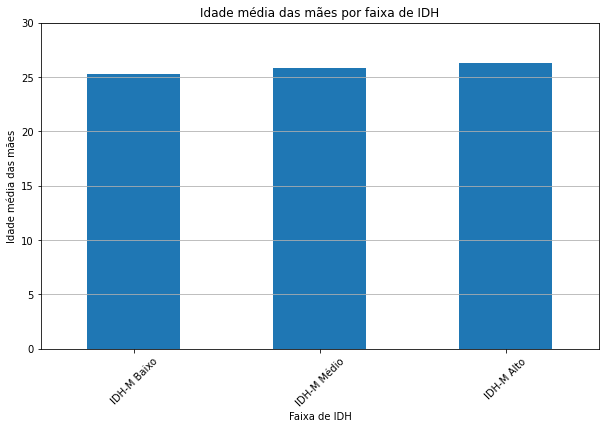

In [11]:
# Agrupamento por faixa de IDH e cálculo da idade média das mães
idade_media_por_idh = sinasc_raw.groupby('faixa_idh')['IDADEMAE'].mean()

idade_media_por_idh = idade_media_por_idh.sort_values()

# Plotagem do gráfico de barras
idade_media_por_idh.plot(kind='bar', figsize=(10, 6))
plt.title('Idade média das mães por faixa de IDH')
plt.xlabel('Faixa de IDH')
plt.ylabel('Idade média das mães')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.gca().set_ylim([0, 30])
plt.show()

# O IDH leva em consideração a expectativa de vida, o nível de educação e a renda.
# As mulheres que vivem em cidades com IDH mais alto, tendem a ser mães com idade um pouco mais avançada.

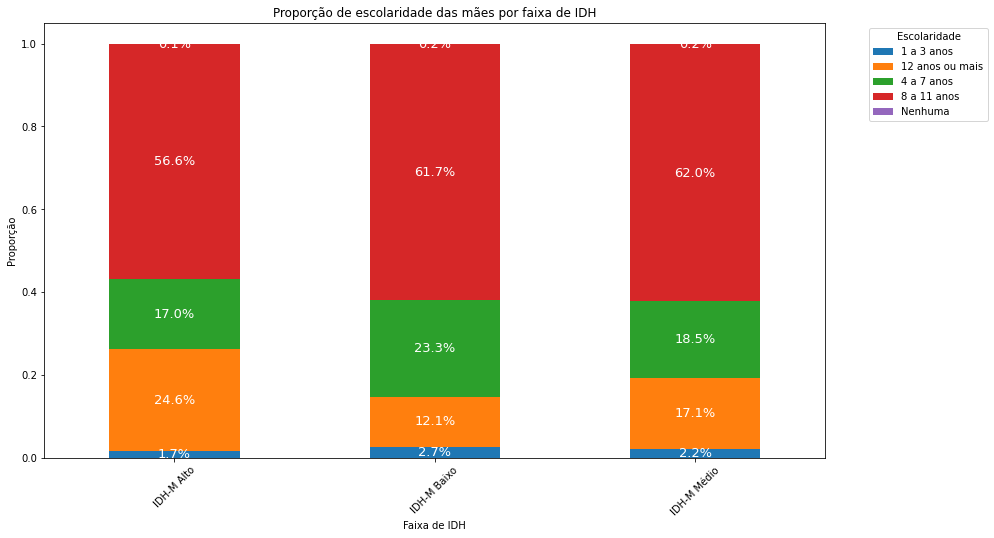

In [12]:
proporcoes = sinasc_raw.groupby(['faixa_idh', 'ESCMAE']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Plotando o gráfico de barras empilhadas
ax = proporcoes.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Proporção de escolaridade das mães por faixa de IDH')
plt.xlabel('Faixa de IDH')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.legend(title='Escolaridade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)

# Adicionando rótulos de dados
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width / 2, y + height / 2),
                    ha='center', va='center', fontsize=13, color='white')

plt.show()

# Nessa análise conseguimos ver que quanto maior o IDH, maior é a proporção de mulheres com grau de escolaridade mais avançado, de 12 anos ou mais,
# o que ajuda a complementar com a visão da análise anterior, que correlacionava a faixa de IDH com as idades médias das mães.

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [13]:
mapeamento_ifdm = {
    # Desenvolvimento Moderado
   "Ariquemes": "Desenvolvimento Moderado",
    "Vilhena": "Desenvolvimento Moderado",
    "Pimenta Bueno": "Desenvolvimento Moderado",
    "Porto Velho": "Desenvolvimento Moderado",
    "Ji-Paraná": "Desenvolvimento Moderado",
    "Cacoal": "Desenvolvimento Moderado",
    "Santa Luzia do Oeste": "Desenvolvimento Moderado",
    "Rolim de Moura": "Desenvolvimento Moderado",
    "Chupinguaia": "Desenvolvimento Moderado",
    "São Miguel do Guaporé": "Desenvolvimento Moderado",
    "Pimenteiras do Oeste": "Desenvolvimento Moderado",
    "Teixeirópolis": "Desenvolvimento Moderado",
    "Colorado do Oeste": "Desenvolvimento Moderado",
    "Jaru": "Desenvolvimento Moderado",
    "Rio Crespo": "Desenvolvimento Moderado",
    "Primavera de Rondônia": "Desenvolvimento Moderado",
    "Alta Floresta do Oeste": "Desenvolvimento Moderado",
    "Ouro Preto do Oeste": "Desenvolvimento Moderado",
    "São Francisco do Guaporé": "Desenvolvimento Moderado",
    "Candeias do Jamari": "Desenvolvimento Moderado",
    "Buritis": "Desenvolvimento Moderado",
    "São Felipe do Oeste": "Desenvolvimento Moderado",
    "Presidente Médici": "Desenvolvimento Moderado",
    "Cerejeiras": "Desenvolvimento Moderado",
    "Monte Negro": "Desenvolvimento Moderado",
    "Urupá": "Desenvolvimento Moderado",
    # Desenvolvimento Regular
    "Espigão do Oeste": "Desenvolvimento Regular",
    "Seringueiras": "Desenvolvimento Regular",
    "Alvorada do Oeste": "Desenvolvimento Regular",
    "Itapuã do Oeste": "Desenvolvimento Regular",
    "Cabixi": "Desenvolvimento Regular",
    "Novo Horizonte do Oeste": "Desenvolvimento Regular",
    "Nova Brasilândia do Oeste": "Desenvolvimento Regular",
    "Vale do Paraíso": "Desenvolvimento Regular",
    "Corumbiara": "Desenvolvimento Regular",
    "Alto Paraíso": "Desenvolvimento Regular",
    "Cacaulândia": "Desenvolvimento Regular",
    "Vale do Anari": "Desenvolvimento Regular",
    "Ministro Andreazza": "Desenvolvimento Regular",
    "Costa Marques": "Desenvolvimento Regular",
    "Nova União": "Desenvolvimento Regular",
    "Guajará-Mirim": "Desenvolvimento Regular",
    "Mirante da Serra": "Desenvolvimento Regular",
    "Parecis": "Desenvolvimento Regular",
    "Castanheiras": "Desenvolvimento Regular",
    "Theobroma": "Desenvolvimento Regular",
    "Machadinho do Oeste": "Desenvolvimento Regular",
    "Campo Novo de Rondônia": "Desenvolvimento Regular",
    "Nova Mamoré": "Desenvolvimento Regular",
    "Cujubim": "Desenvolvimento Regular",
    "Alto Alegre dos Parecis": "Desenvolvimento Regular",
    "Governador Jorge Teixeira": "Desenvolvimento Regular"
}

sinasc_raw['faixa_ifdm'] = sinasc_raw['munResNome'].map(mapeamento_ifdm)

C:\Users\BrunodaCunhaPeixoto\AppData\Local\Temp\ipykernel_23780\3542664582.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_raw['faixa_ifdm'] = sinasc_raw['munResNome'].map(mapeamento_ifdm)


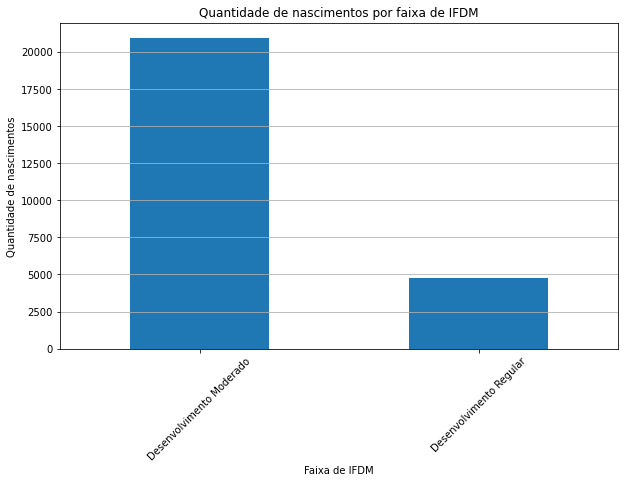

In [14]:
# Agrupamento por faixa de IFDM e contagem de nascimentos
nascimentos_por_ifdm = sinasc_raw.groupby('faixa_ifdm').size()

# Plotagem do gráfico de barras
nascimentos_por_ifdm.plot(kind='bar', figsize=(10, 6))
plt.title('Quantidade de nascimentos por faixa de IFDM')
plt.xlabel('Faixa de IFDM')
plt.ylabel('Quantidade de nascimentos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# O IFDM mede o índice de desenvolvimento do município a partir do emprego e renda como um único indicador e educação e saúde como indicadores separados
# É interessante observar que cidades com um desenvolvimento em um ritmo mais elevado também estão sendo os municipios com o maior número de nascimentos.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [15]:
mapeamento_pib = {
    "Porto Velho": "Acima de 1 Bilhão",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Vilhena": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Cacoal": "Acima de 1 Bilhão",
    "Jaru": "Acima de 1 Bilhão",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão do Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões",
}


sinasc_raw['faixa_pib'] = sinasc_raw['munResNome'].map(mapeamento_pib)

C:\Users\BrunodaCunhaPeixoto\AppData\Local\Temp\ipykernel_23780\2124381047.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_raw['faixa_pib'] = sinasc_raw['munResNome'].map(mapeamento_pib)


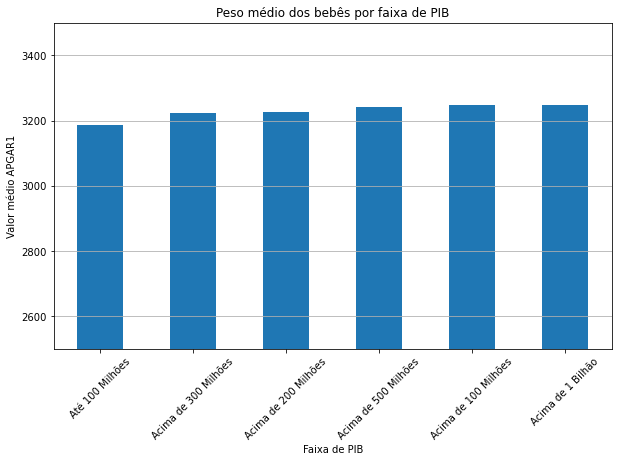

In [16]:
# Agrupamento por faixa de PIB e cálculo da média do peso dos bebês
peso_medio_por_pib = sinasc_raw.groupby('faixa_pib')['PESO'].mean()

peso_medio_por_pib = peso_medio_por_pib.sort_values()

# Plotagem do gráfico de barras
peso_medio_por_pib.plot(kind='bar', figsize=(10, 6))
plt.title('Peso médio dos bebês por faixa de PIB')
plt.xlabel('Faixa de PIB')
plt.ylabel('Valor médio APGAR1')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.gca().set_ylim([2500, 3500])
plt.show()

# Um PIB menor significa uma economia mais fraca, e isso por sua vez pode indicar um local onde pessoas tenham mais dificuldades de acesso à certas coisas,
# como saúde, educação e até alimento. Dessa forma, faz sentido que os bebês nascidos dessa faixa sejam mais leves, pois as mães podem ter uma nutrição limitada,
# prejudicando o desenvolvimento da criança durante a gestação.

In [19]:
#Replicando a abordagem sugerida
sinasc_4 = sinasc_raw[['munResNome', 'IDADEMAE', 'ESCMAE', 'IDADEPAI']]

sinasc_4.set_index('munResNome', inplace=True)

sinasc_4['faixa_pib'] = sinasc_4.index.to_series().map(mapeamento_pib)

sinasc_4.groupby(['faixa_pib', 'ESCMAE'])[['IDADEMAE', 'IDADEPAI']].agg(['mean', 'max', 'min'])

C:\Users\BrunodaCunhaPeixoto\AppData\Local\Temp\ipykernel_23780\3159043680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_4['faixa_pib'] = sinasc_4.index.to_series().map(mapeamento_pib)


IDADEMAE           IDADEPAI            
                                           mean max min       mean   max   min
faixa_pib            ESCMAE                                                   
Acima de 1 Bilhão    1 a 3 anos       28.048611  45  12  33.320000  44.0  18.0
                     12 anos ou mais  29.686516  47  16  33.016372  65.0  17.0
                     4 a 7 anos       24.093962  46  12  30.337054  63.0  16.0
                     8 a 11 anos      25.272137  47  12  29.994941  70.0  15.0
                     Nenhuma          30.869565  42  14  39.000000  39.0  39.0
Acima de 100 Milhões 1 a 3 anos       29.731707  44  16  39.555556  60.0  22.0
                     12 anos ou mais  28.525926  43  17  33.085271  52.0  19.0
                     4 a 7 anos       25.691892  42  12  32.896552  73.0  17.0
                     8 a 11 anos      24.699138  46  13  30.428571  58.0  17.0
                     Nenhuma          39.000000  52  28  34.000000  38.0  30.0
Acima de 200 Milhões 1 a 3 anos       27.428571  37  17  38.200000  55.0  23.0
                     12 anos ou mais  27.821053  41  18  32.314286  44.0  21.0
                     4 a 7 anos       25.032680  40  13  29.145161  46.0  17.0
                     8 a 11 anos      24.858247  44  14  30.044025  52.0  16.0
                     Nenhuma          35.000000  35  35        NaN   NaN   NaN
Acima de 300 Milhões 1 a 3 anos       29.692308  43  14  33.294118  46.0  17.0
                     12 anos ou mais  28.850000  51  17  31.919118  58.0  19.0
                     4 a 7 anos       25.265823  47  11  31.111111  54.0  19.0
                     8 a 11 anos      24.859768  46  14  28.687296  64.0  16.0
Acima de 500 Milhões 1 a 3 anos       28.761905  43  16  30.142857  41.0  21.0
                     12 anos ou mais  29.456086  44  17  33.217899  60.0  19.0
                     4 a 7 anos       25.241212  44  13  31.941176  86.0  16.0
                     8 a 11 anos      24.854100  53  14  30.085217  56.0  16.0
                     Nenhuma          29.444444  42  20  36.000000  43.0  29.0
Até 100 Milhões      1 a 3 anos       29.714286  39  20  33.000000  38.0  28.0
                     12 anos ou mais  29.709677  41  19  31.489362  45.0  19.0
                     4 a 7 anos       25.346667  40  16  32.891892  67.0  18.0
                     8 a 11 anos      25.877395  40  14  31.230303  61.0  17.0
                     Nenhuma          35.000000  35  35        NaN   NaN   NaN